In [9]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation

Загрузим датасет

In [38]:
df = pd.read_csv("./waterQuality1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Посмотрим пример данных

In [11]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


Проверка на пропуски:

In [12]:
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

Пропусков нет

Столбцы ammonia и is_safe имеют тип object, преобразуем к float64

In [14]:
df['ammonia'] = pd.to_numeric(df['ammonia'])

ValueError: ignored

Видим, что вместо пропусков на самом деле стоят строки #NUM! Поменяем на np.nan

In [39]:
missing_value = ['#NUM!', np.nan]
df = pd.read_csv('./waterQuality1.csv', na_values = missing_value)

Удалим их

In [40]:
df.dropna( subset=['ammonia', 'is_safe'], axis=0, inplace=True)

Смотрим, что получилось

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

Удалены 3 записи, все столбцы теперь одинакового типа

In [18]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [19]:
df.nunique()

aluminium       495
ammonia        2563
arsenic         107
barium          480
cadmium          23
chloramine      812
chromium         91
copper          201
flouride        151
bacteria        101
viruses          61
lead            200
nitrates       1803
nitrites        280
mercury          11
perchlorate    2999
radium          735
selenium         11
silver           51
uranium          10
is_safe           2
dtype: int64

Проверка на дубликаты

In [20]:
df.drop_duplicates()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1.0


Дубликатов не оказалось

In [21]:
corrMatrix = df.corr()
corrMatrix

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067369,0.225725,0.294091,-0.099902,0.369221,0.353134,0.168569,-0.009877,-0.078324,...,0.020957,-0.003851,0.237439,-0.003129,0.362986,0.243396,-0.003651,0.334923,0.014723,0.333974
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,...,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635,-0.022919
arsenic,0.225725,0.046783,1.000000,0.362925,0.334782,0.356509,0.312421,-0.036488,0.003731,0.035642,...,-0.087669,0.027533,0.305113,-0.015288,0.332228,0.218328,-0.006993,0.307794,0.001469,-0.123362
barium,0.294091,0.070099,0.362925,1.000000,-0.037901,0.446869,0.415937,0.065277,-0.018637,0.101304,...,-0.042829,-0.011423,0.312783,0.006165,0.462207,0.286890,0.035222,0.431542,-0.002541,0.090858
cadmium,-0.099902,-0.006422,0.334782,-0.037901,1.000000,-0.144366,-0.157716,-0.109252,0.005005,-0.092133,...,-0.035313,0.020232,-0.015829,-0.016169,-0.149269,-0.098936,0.009933,-0.155441,-0.005911,-0.256034
chloramine,0.369221,0.104775,0.356509,0.446869,-0.144366,1.000000,0.555846,0.118975,0.004254,0.154443,...,-0.030241,-0.001619,0.379916,-0.021198,0.588683,0.389119,0.011435,0.522372,-0.007648,0.186704
chromium,0.353134,0.124782,0.312421,0.415937,-0.157716,0.555846,1.000000,0.113003,-0.002424,0.141937,...,-0.050254,-0.012843,0.335940,-0.022541,0.524432,0.315484,0.030598,0.510705,-0.005472,0.182306
copper,0.168569,0.015953,-0.036488,0.065277,-0.109252,0.118975,0.113003,1.000000,0.011647,0.149271,...,0.121762,0.002259,0.162092,0.017785,0.104527,0.026534,-0.003356,0.089241,0.006802,0.029498
flouride,-0.009877,-0.028221,0.003731,-0.018637,0.005005,0.004254,-0.002424,0.011647,1.000000,0.013984,...,0.012146,-0.008245,-0.016591,-0.004263,-0.016352,0.007683,0.022726,0.014446,0.016849,0.006550
bacteria,-0.078324,0.063603,0.035642,0.101304,-0.092133,0.154443,0.141937,0.149271,0.013984,1.000000,...,-0.027179,-0.033993,0.246463,-0.004406,0.147526,0.099080,-0.006779,0.148199,0.045077,-0.022077


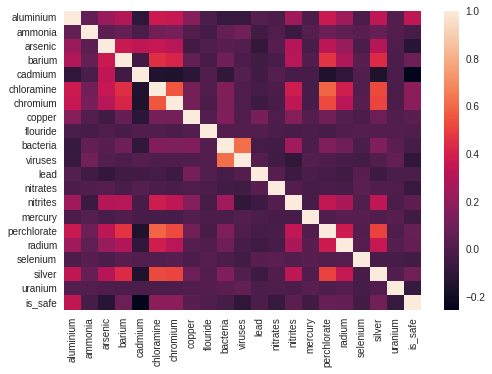

In [22]:
sns.heatmap(corrMatrix)


In [23]:
def visualize(dataset):
    fig, ax = plt.subplots(5, 4, figsize = (30, 20))
    fig.suptitle('Распределения числовых признаков')
    cols = df.columns
    for i in range(20):
        sns.histplot(df[cols[i]], ax = ax[i // 4][i % 4], kde = True)
    pass

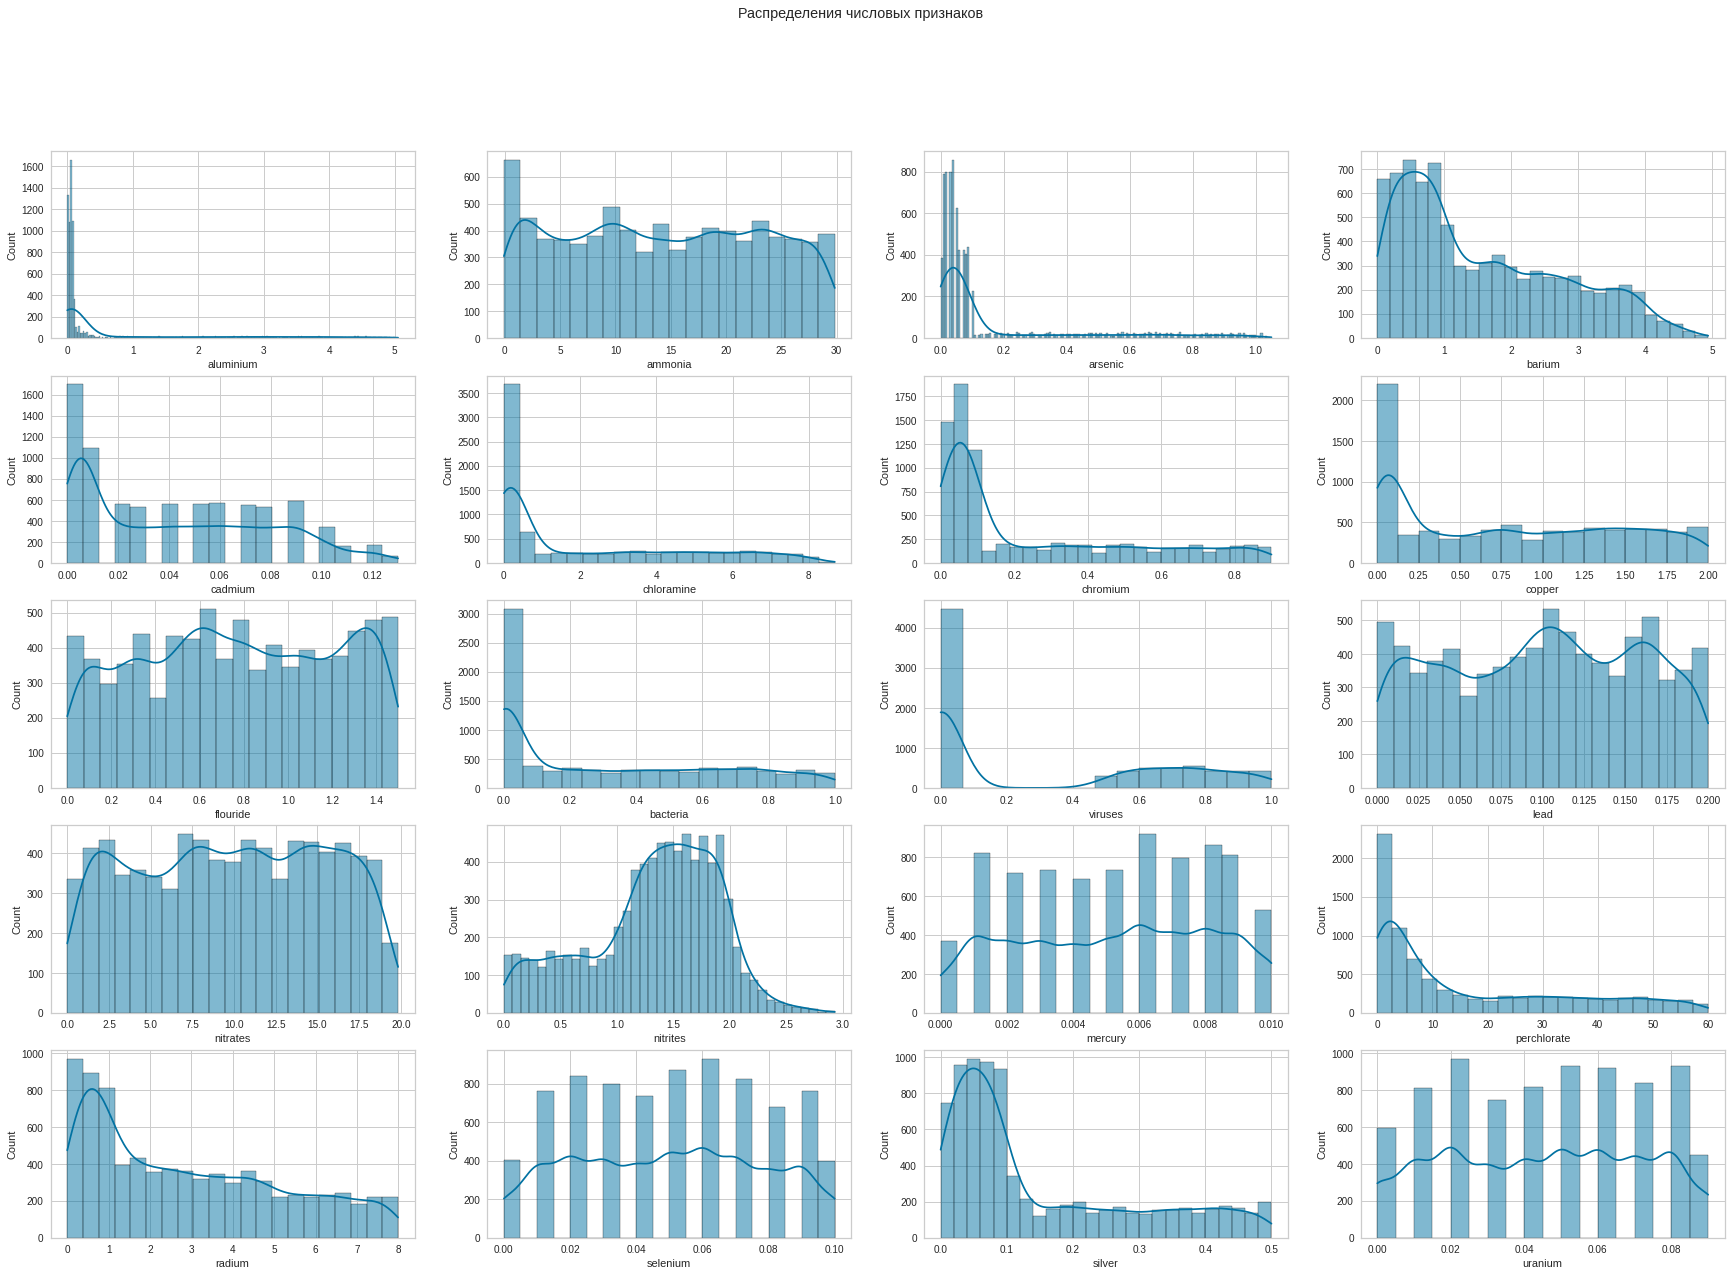

In [24]:
visualize(df)

Видим, что данные для половины столбцов распределены плохо

Проверим столбцы на сильную корреляцию с итоговым результатом

In [25]:
def correlated_columns(df, threshold_corr, target_col):
    df = df.drop(target_col, axis=1)
    corr_matrix = df.corr() 
    correlated_features=[]
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold_corr: # we are interested in absolute coeff value
               colname = corr_matrix.columns[i]  # getting the name of column
               correlated_features.append(colname)
    correlated_features = list(dict.fromkeys(correlated_features))
    return correlated_features

In [36]:
correlated_features = correlated_columns(df, 0.95, 'is_safe') 
correlated_features

[]

Сильной корреляции не найдено

Соотношение классов

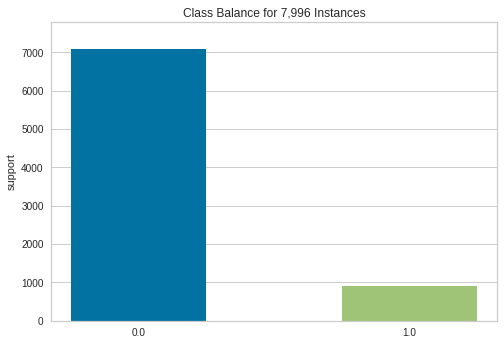

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff889a782d0>)

In [27]:
class_balance(df['is_safe'])

Классы несбалансированы, проведем аугментацию


In [41]:
goodWater = df['is_safe'] == 1
meanGood = []
for i in df.columns:
  meanGood.append(df.loc[goodWater, i].mean())
meanGood

[1.844078947368421,
 13.711096491228071,
 0.07462390350877195,
 1.8758881578947368,
 0.017081140350877193,
 3.5133552631578953,
 0.38481359649122804,
 0.859671052631579,
 0.779594298245614,
 0.2994407894736842,
 0.22645065789473684,
 0.09781469298245615,
 8.705679824561404,
 1.4049122807017544,
 0.0048881578947368425,
 20.19873903508772,
 3.339210526315789,
 0.04720394736842107,
 0.1889473684210526,
 0.03900219298245614,
 1.0]

In [42]:
dispGood = []
for i in df.columns:
  dispGood.append(df.loc[goodWater, i].std())
dispGood

[1.5966973413604604,
 8.634489828773495,
 0.1596534666614481,
 1.2037749262623019,
 0.028026723871127836,
 2.4485202711017973,
 0.2761940811902499,
 0.6279252520728624,
 0.4280401689891063,
 0.3196884027700674,
 0.3450234688395279,
 0.05683990345447061,
 5.59311502219394,
 0.4392136884093219,
 0.0030315921820648836,
 14.396278152464573,
 2.287692703388297,
 0.028504049932545572,
 0.1536550282251934,
 0.02674414275901208,
 0.0]

Добавление нормально распределенных признаков с заданными матожиданием и дисперсией

In [43]:
for col in df.columns:
  res = []
  for i in range(len(dispGood) - 1):
    num_samples = 6000
    desired_mean = meanGood[i]
    desired_std_dev = dispGood[i]

    samples = np.random.normal(loc=0.0, scale=desired_std_dev, size=num_samples)

    actual_mean = np.mean(samples)
    actual_std = np.std(samples)

    zero_mean_samples = samples - (actual_mean)

    zero_mean_mean = np.mean(zero_mean_samples)
    zero_mean_std = np.std(zero_mean_samples)

    scaled_samples = zero_mean_samples * (desired_std_dev/zero_mean_std)
    scaled_mean = np.mean(scaled_samples)
    scaled_std = np.std(scaled_samples)

    final_samples = scaled_samples + desired_mean
    final_mean = np.mean(final_samples)
    final_std = np.std(final_samples)
    res.append(np.absolute(final_samples))
  res.append(np.ones(6000))
res = np.array(np.absolute(res))

In [44]:
df2 = pd.DataFrame(data = res.transpose(), columns = df.columns)
df = df.append(df2, ignore_index=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13996 entries, 0 to 13995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    13996 non-null  float64
 1   ammonia      13996 non-null  float64
 2   arsenic      13996 non-null  float64
 3   barium       13996 non-null  float64
 4   cadmium      13996 non-null  float64
 5   chloramine   13996 non-null  float64
 6   chromium     13996 non-null  float64
 7   copper       13996 non-null  float64
 8   flouride     13996 non-null  float64
 9   bacteria     13996 non-null  float64
 10  viruses      13996 non-null  float64
 11  lead         13996 non-null  float64
 12  nitrates     13996 non-null  float64
 13  nitrites     13996 non-null  float64
 14  mercury      13996 non-null  float64
 15  perchlorate  13996 non-null  float64
 16  radium       13996 non-null  float64
 17  selenium     13996 non-null  float64
 18  silver       13996 non-null  float64
 19  uran

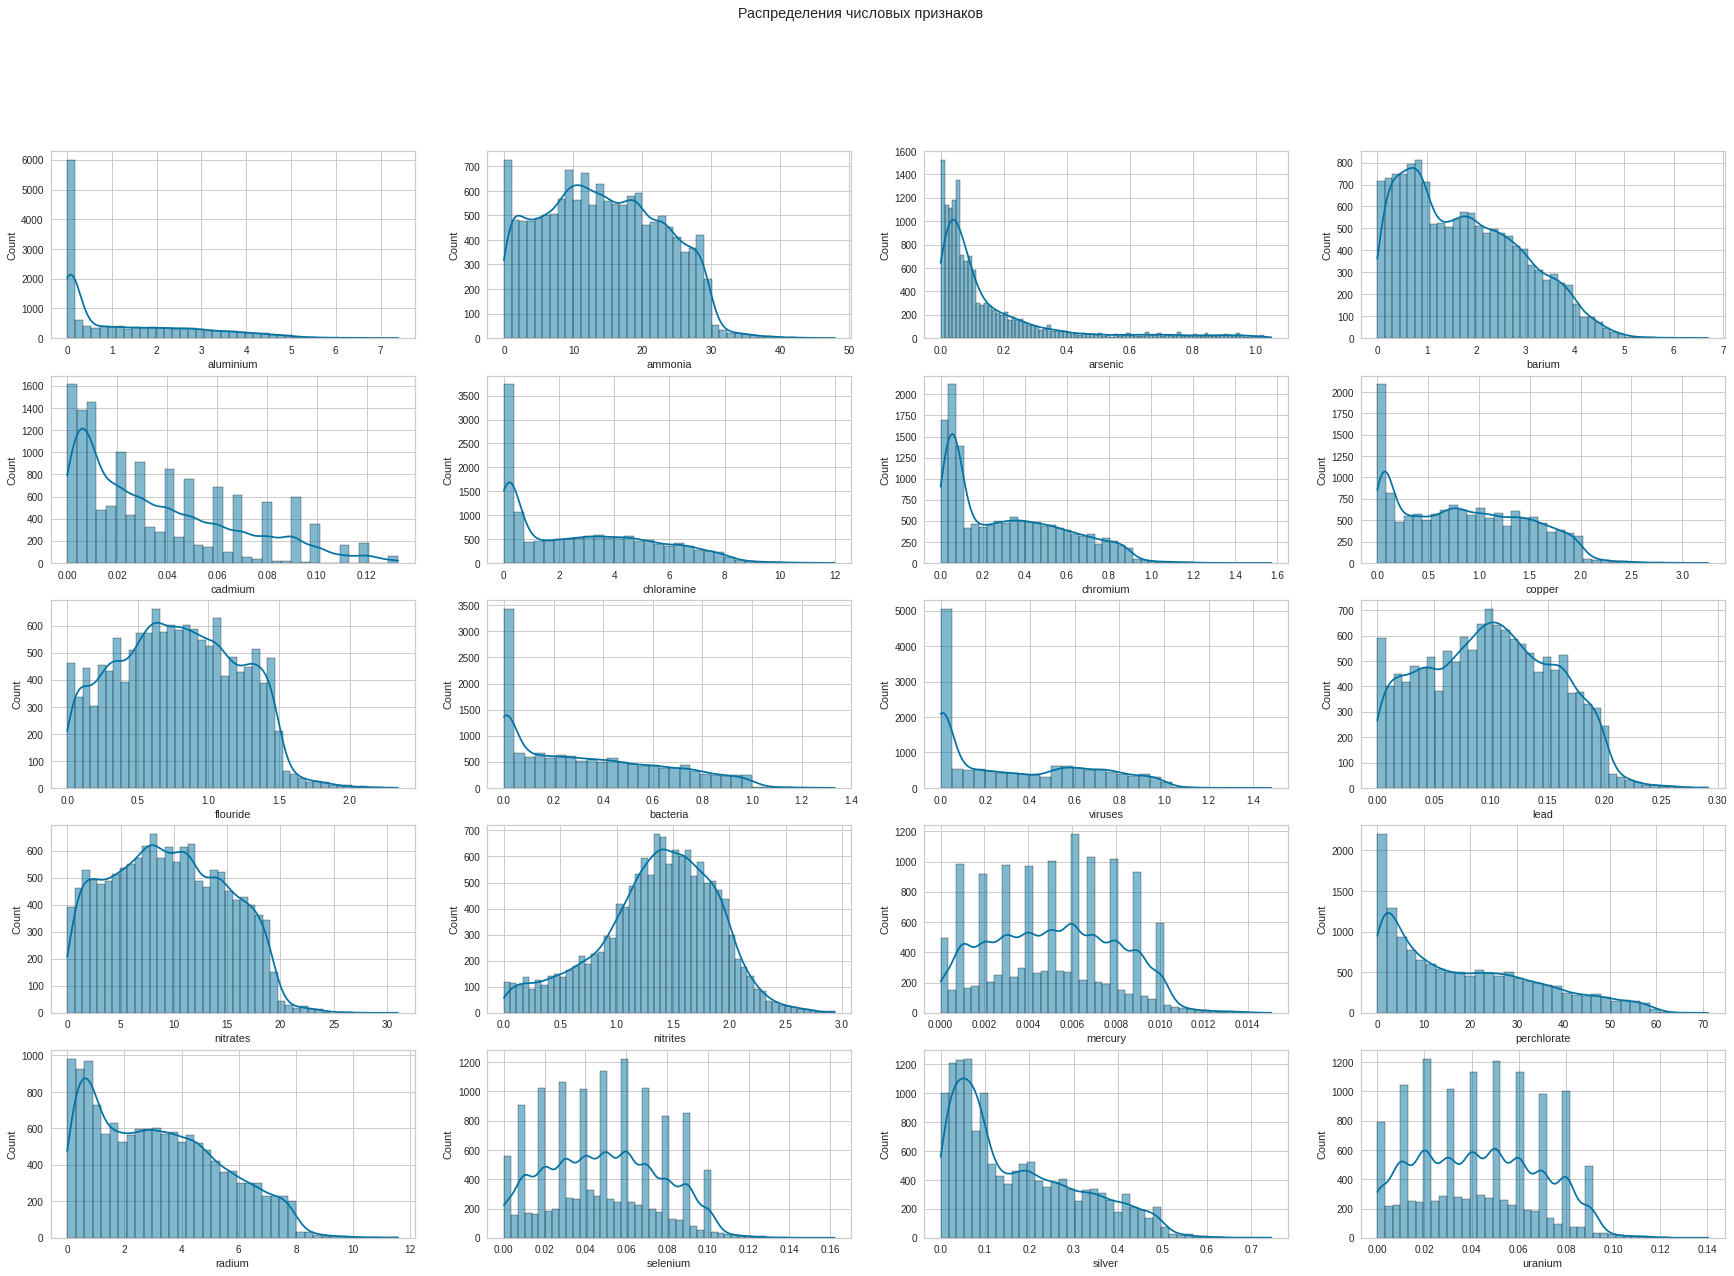

In [46]:
visualize(df)

Как видим, распределения сильно лучше не стали. Подробнее результатах разделения до и после аугментации написано в отчете.

Посмотрим на корреляцию

In [47]:
corrMatrix = df.corr()
corrMatrix

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.027315,0.114081,0.228102,-0.183530,0.327400,0.301977,0.124494,0.002140,-0.014936,...,0.014513,-0.041428,0.166662,-0.017431,0.268294,0.181130,-0.012727,0.263962,-0.023493,0.513740
ammonia,0.027315,1.000000,0.033854,0.052744,-0.001395,0.061537,0.073296,0.006681,-0.019213,0.039788,...,-0.019662,0.004115,-0.035392,0.008789,0.054627,0.030974,0.020939,0.054113,0.000073,-0.015855
arsenic,0.114081,0.033854,1.000000,0.255363,0.284547,0.240879,0.206457,-0.029427,0.003788,0.025807,...,-0.067020,0.016808,0.232514,-0.006763,0.253462,0.154927,-0.003904,0.213371,0.006560,-0.098985
barium,0.228102,0.052744,0.255363,1.000000,-0.064808,0.313689,0.285345,0.058598,-0.017326,0.071108,...,-0.028206,-0.026758,0.215036,-0.002520,0.325619,0.199592,0.016397,0.295541,-0.011784,0.169347
cadmium,-0.183530,-0.001395,0.284547,-0.064808,1.000000,-0.173310,-0.186848,-0.094781,-0.007904,-0.085634,...,-0.025531,0.033459,-0.027662,-0.001293,-0.149526,-0.107694,0.009724,-0.155572,0.017866,-0.336583
chloramine,0.327400,0.061537,0.240879,0.313689,-0.173310,1.000000,0.405649,0.096549,0.012138,0.123804,...,-0.019070,-0.029730,0.269194,-0.012399,0.422798,0.278611,0.000926,0.363228,-0.024474,0.325128
chromium,0.301977,0.073296,0.206457,0.285345,-0.186848,0.405649,1.000000,0.096656,0.004617,0.100615,...,-0.036625,-0.032854,0.225978,-0.019015,0.377360,0.225757,0.013166,0.361191,-0.028843,0.321160
copper,0.124494,0.006681,-0.029427,0.058598,-0.094781,0.096549,0.096656,1.000000,0.010787,0.099774,...,0.078085,0.000501,0.118365,0.013990,0.085567,0.019550,0.003463,0.069091,-0.002064,0.083081
flouride,0.002140,-0.019213,0.003788,-0.017326,-0.007904,0.012138,0.004617,0.010787,1.000000,0.014367,...,0.004060,-0.011762,-0.005399,-0.006579,0.000194,0.005911,0.012202,0.014187,0.005296,0.021427
bacteria,-0.014936,0.039788,0.025807,0.071108,-0.085634,0.123804,0.100615,0.099774,0.014367,1.000000,...,-0.014999,-0.022123,0.178886,-0.001174,0.110999,0.073131,-0.002676,0.108708,0.014697,0.048468


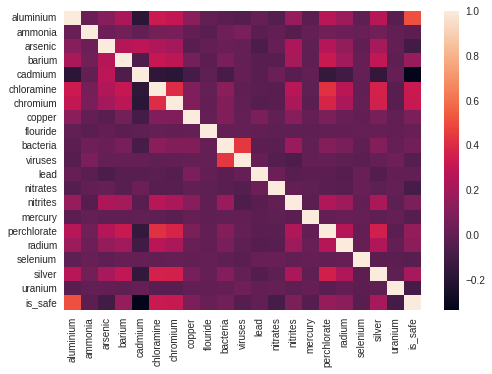

In [48]:
sns.heatmap(corrMatrix)

Скореллированность некоторых признаков упала, но в целом больших изменений нет

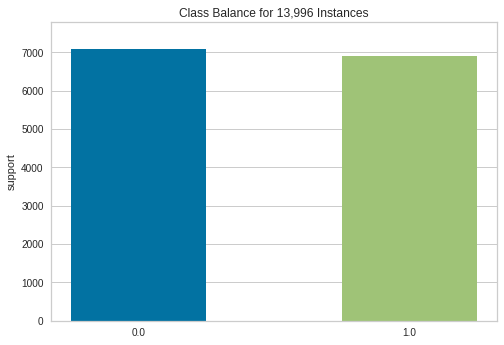

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff88a13ec10>)

In [49]:
class_balance(df['is_safe'])

Классы сбалансированы

In [50]:
df.to_csv('./out.csv', index=False)